# Dataset

https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate

# For New Users

## Install Packages

Convert this cell to code, remove the (```), run, then put it back to as it was.

```
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn
!pip install imbalanced-learn
```

---

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  # (1/2)
from sklearn.impute import IterativeImputer  # (2/2)
from sklearn.neighbors import KNeighborsRegressor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, \
    StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, \
    recall_score, f1_score, roc_auc_score, average_precision_score, \
    confusion_matrix, classification_report, precision_recall_curve, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pickle

---

# Original Data

In [2]:
filename = "pulsar_data_train.csv"

In [3]:
df = pd.read_csv(filename, delimiter=",")

## Total Elements in Dataset

In [4]:
df.size

112752

## Rows, Cols

In [5]:
df.shape

(12528, 9)

In [6]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


---

# Data Reformatting

## Headers Renamed

Renaming the headers so to reduce clutter.

In [7]:
header_dict = {
    " Mean of the integrated profile": "IntegratedProfileMean",
    " Standard deviation of the integrated profile": "IntegratedProfileStdDev",
    " Excess kurtosis of the integrated profile": "IntegratedProfileExKurtosis",
    " Skewness of the integrated profile": "IntegratedProfileSkewness",
    " Mean of the DM-SNR curve": "DMSNRMean",
    " Standard deviation of the DM-SNR curve": "DMSNRStdDev",
    " Excess kurtosis of the DM-SNR curve": "DMSNRExKurtosis",
    " Skewness of the DM-SNR curve": "DMSNRSkewness",
    "target_class": "Target"
}

df = df.rename(columns=header_dict)

## Null Value Replacement

In [8]:
df = df.replace(" ", np.nan)

---

# Preliminary Analysis

## Data Stats

In [9]:
df.describe()

,IntegratedProfileMean,IntegratedProfileStdDev,IntegratedProfileExKurtosis,IntegratedProfileSkewness,DMSNRMean,DMSNRStdDev,DMSNRExKurtosis,DMSNRSkewness,Target
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


### Total Elements in Dataset

In [10]:
df.size

112752

### Rows, Cols

In [11]:
df.shape

(12528, 9)

### Nulls Information

In [12]:
null_counts = df.isnull().sum()
total_rows = df.shape[0]
null_percentage = (null_counts / total_rows) * 100
print(null_percentage)

IntegratedProfileMean           0.000000
IntegratedProfileStdDev         0.000000
IntegratedProfileExKurtosis    13.848978
IntegratedProfileSkewness       0.000000
DMSNRMean                       0.000000
DMSNRStdDev                     9.402937
DMSNRExKurtosis                 0.000000
DMSNRSkewness                   4.988825
Target                          0.000000
dtype: float64


Given that all columns in our dataset, including the IntegratedProfileExKurtosis, have a relatively low proportion of missing values — with IntegratedProfileExKurtosis itself having only about 13.8% missing — it is feasible to apply imputation across all categories. This uniform approach to imputation is supported by the low incidence of null values in each column.

### Class Imbalance

In [13]:
target_counts = df["Target"].value_counts(dropna=False)
target_percentage = (target_counts / total_rows) * 100
print(target_percentage)

0.0    90.796616
1.0     9.203384
Name: Target, dtype: float64


Fairly significant class imbalance should be addressed.

## Data Visualisation

### Distributions

In [14]:
features, Class = df.columns[:-1], df.columns[-1]

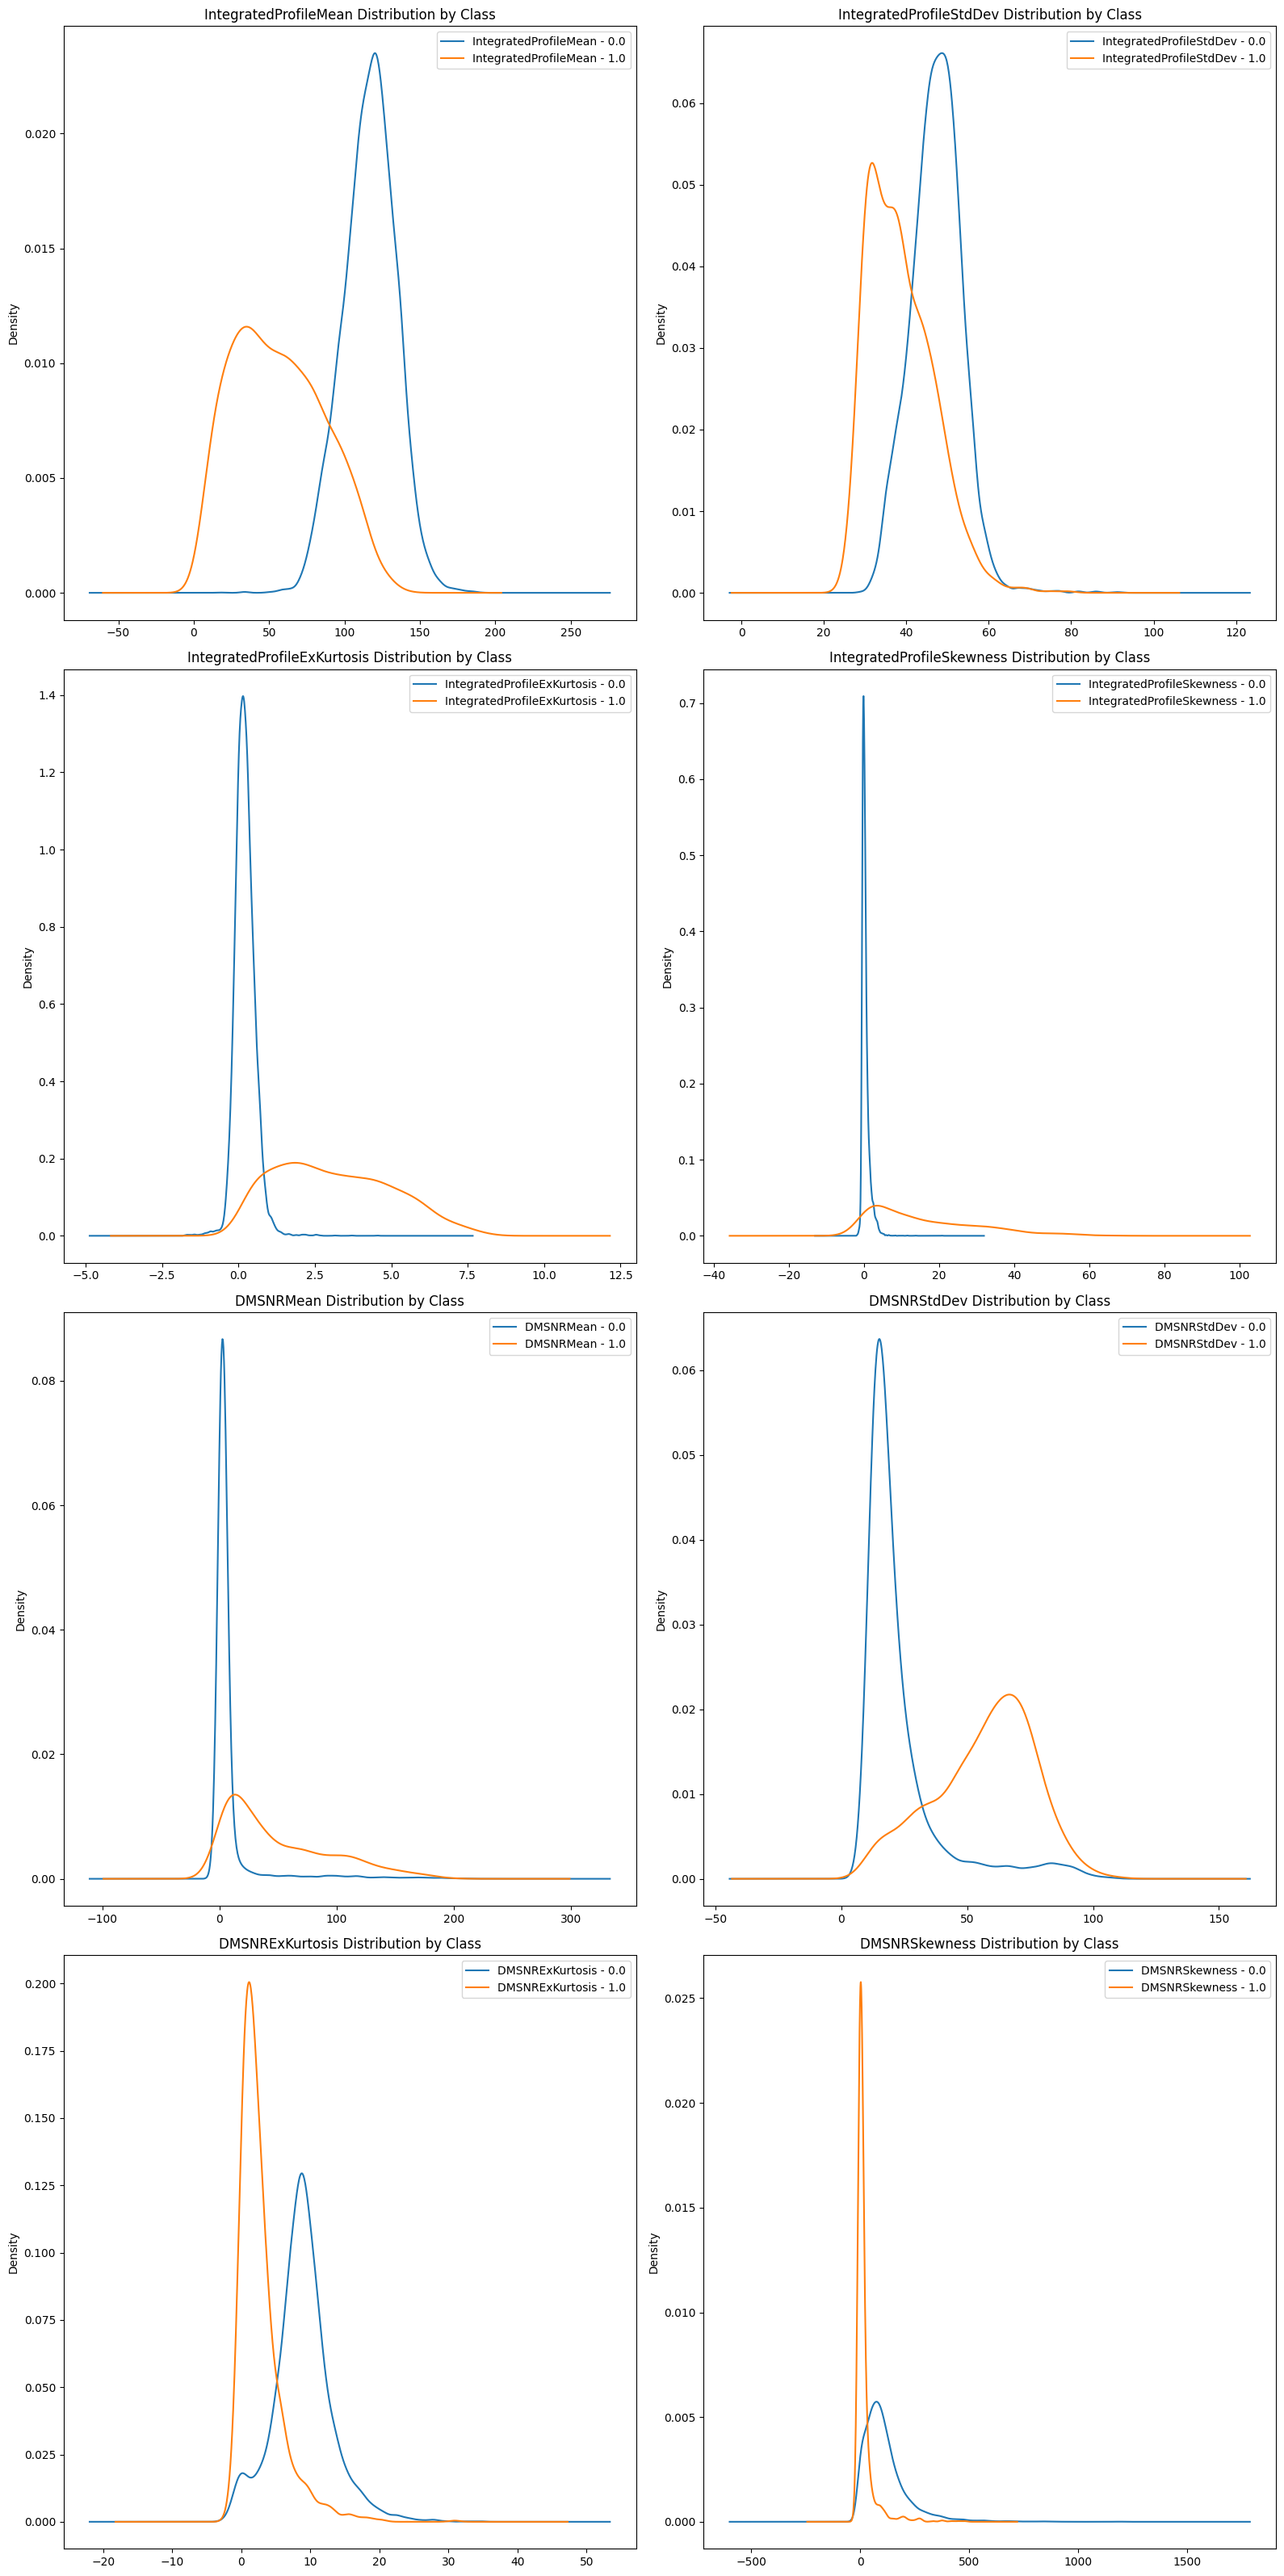

In [15]:
classes = df[Class].dropna().unique()
num_cols = 2
num_rows = int(np.ceil(len(features) / num_cols))
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
axs = axs.flatten()

for i, feature in enumerate(features):
    for c in classes:
        subset = df[df[Class] == c][feature].dropna()
        subset.plot(kind="density", ax=axs[i], label=f"{feature} - {c}")

    axs[i].set_title(f"{feature} Distribution by Class")
    axs[i].legend()

plt.tight_layout()
plt.show()

The observed shift in the distribution of features with respect to different classes suggests that these features effectively capture variations intrinsic to each class. This implies that the features hold valuable information pertinent to class differentiation, indicating their potential utility for predictive modeling.

### Heatmap

The data exhibits characteristics of a normal distribution, suggesting that Pearson's correlation coefficient is an appropriate choice for the subsequent heatmap analysis. This method is particularly well-suited for exploring linear relationships between variables in datasets that adhere closely to normality.

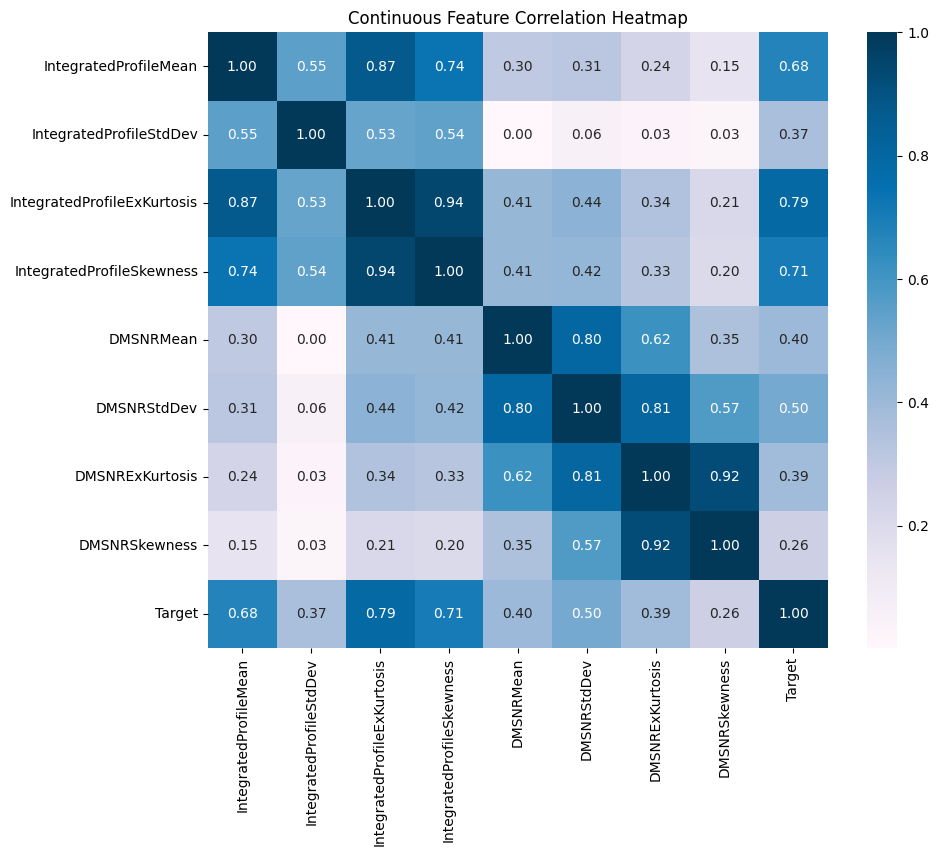

In [16]:
correlation_matrix = df.corr(method="pearson").abs()  # negative is correlation of an opposite nature
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="PuBu", ax=ax)
ax.set_title("Continuous Feature Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Discussion

Highly correlated features can introduce multicollinearity in predictive models, obscuring the individual impact of each feature and potentially inflating the variance of coefficient estimates, which undermines the model's reliability. Furthermore, such redundancy can cause models to overfit, performing well on training data but poorly on new, unseen data, and can also make the model training less efficient.

Based on the provided heatmap:  

IntegratedProfileSkewness, IntegratedProfileExKurtosis, IntegratedProfileMean are highly correlated to each other and so two should be dropped. As IntegratedProfileExKurtosis has the highest value (correlation of 0.79 with target), it will be kept.  

- Drop IntegratedProfileSkewness: due to its very high correlation with IntegratedProfileExKurtosis (0.94).
- Drop IntegratedProfileMean: as it is also highly correlated with IntegratedProfileExKurtosis (0.87).  

This selection targets the redundancy in the dataset while aiming to retain as much information as possible.

---

# Preprocessing of Data

In [17]:
df[Class] = df[Class].astype(int)

## Split DataFrame

In [18]:
train_df, test_df = train_test_split(df, train_size=0.8, random_state=42, stratify=df[Class])

In [19]:
train_df = train_df.sort_index().reset_index(drop=True)
test_df = test_df.sort_index().reset_index(drop=True)

## Normalizing Data

In this analysis, I'm implementing feature scaling to ensure that all numeric attributes are on a common scale. This step is vital because it prevents features with larger scales from disproportionately influencing the model, a common issue in algorithms like K-nearest neighbors and those using gradient descent optimisation. By scaling the features, I aim to enhance model performance, ensuring that each attribute contributes equally to the learning process. Additionally, scaling aids in achieving faster convergence during model training and maintains a balance in regularisation, thus improving both the accuracy and computational efficiency of the machine learning models used in this study.

In [20]:
categorical_columns = [Class]
continuous_columns = train_df.columns.drop(categorical_columns)

scaler = StandardScaler()

scaled_train_continuous = scaler.fit_transform(train_df[continuous_columns])
scaled_test_continuous = scaler.transform(test_df[continuous_columns])

scaled_train_continuous_df = pd.DataFrame(scaled_train_continuous, columns=continuous_columns)
scaled_test_continuous_df = pd.DataFrame(scaled_test_continuous, columns=continuous_columns)

train_categorical = train_df[categorical_columns].reset_index(drop=True)
test_categorical = test_df[categorical_columns].reset_index(drop=True)

scaled_train_df = pd.concat([scaled_train_continuous_df, train_categorical], axis=1)
scaled_test_df = pd.concat([scaled_test_continuous_df, test_categorical], axis=1)

In [21]:
scaled_train_df.head()

,IntegratedProfileMean,IntegratedProfileStdDev,IntegratedProfileExKurtosis,IntegratedProfileSkewness,DMSNRMean,DMSNRStdDev,DMSNRExKurtosis,DMSNRSkewness,Target
0,0.391977,0.268627,-0.093706,-0.288712,-0.321551,-0.405377,-0.194724,-0.377203,0
1,0.760489,0.985402,-0.323303,-0.335317,-0.335952,-0.203456,0.039036,-0.293790,0
2,1.769241,0.341384,-0.654687,-0.314654,0.162432,NaN,-1.186707,-0.922147,0
3,-1.242056,-0.612596,0.558757,0.081650,4.364166,NaN,-1.994743,-1.001108,0
4,-0.067213,1.381381,0.086139,-0.277325,-0.334113,-0.349477,0.245506,-0.074321,0


## Imputation

In [22]:
imputer = IterativeImputer(KNeighborsRegressor(n_neighbors=10), missing_values=np.nan, random_state=42, max_iter=20, tol=0.001)

features_columns = [col for col in scaled_train_df.columns if col != Class]

imputer.fit(scaled_train_df[features_columns])

train_features_imputed = pd.DataFrame(imputer.transform(scaled_train_df[features_columns]), columns=features_columns)
test_features_imputed = pd.DataFrame(imputer.transform(scaled_test_df[features_columns]), columns=features_columns)

train_df_imputed = pd.concat([train_features_imputed, scaled_train_df[[Class]].reset_index(drop=True)], axis=1)
test_df_imputed = pd.concat([test_features_imputed, scaled_test_df[[Class]].reset_index(drop=True)], axis=1)

C:\Users\Chaos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [23]:
train_df_imputed.head()

,IntegratedProfileMean,IntegratedProfileStdDev,IntegratedProfileExKurtosis,IntegratedProfileSkewness,DMSNRMean,DMSNRStdDev,DMSNRExKurtosis,DMSNRSkewness,Target
0,0.391977,0.268627,-0.093706,-0.288712,-0.321551,-0.405377,-0.194724,-0.377203,0
1,0.760489,0.985402,-0.323303,-0.335317,-0.335952,-0.203456,0.039036,-0.293790,0
2,1.769241,0.341384,-0.654687,-0.314654,0.162432,1.110095,-1.186707,-0.922147,0
3,-1.242056,-0.612596,0.558757,0.081650,4.364166,3.160938,-1.994743,-1.001108,0
4,-0.067213,1.381381,0.086139,-0.277325,-0.334113,-0.349477,0.245506,-0.074321,0


## Split Data

In [24]:
X_train = train_df_imputed.drop(Class, axis=1)
y_train = train_df_imputed[Class]
X_test = test_df_imputed.drop(Class, axis=1)
y_test = test_df_imputed[Class]

In [25]:
X_train.head()

,IntegratedProfileMean,IntegratedProfileStdDev,IntegratedProfileExKurtosis,IntegratedProfileSkewness,DMSNRMean,DMSNRStdDev,DMSNRExKurtosis,DMSNRSkewness
0,0.391977,0.268627,-0.093706,-0.288712,-0.321551,-0.405377,-0.194724,-0.377203
1,0.760489,0.985402,-0.323303,-0.335317,-0.335952,-0.203456,0.039036,-0.293790
2,1.769241,0.341384,-0.654687,-0.314654,0.162432,1.110095,-1.186707,-0.922147
3,-1.242056,-0.612596,0.558757,0.081650,4.364166,3.160938,-1.994743,-1.001108
4,-0.067213,1.381381,0.086139,-0.277325,-0.334113,-0.349477,0.245506,-0.074321


In [26]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

## Oversample w/ SMOTE

In [27]:
y_train.value_counts()

0    9100
1     922
Name: Target, dtype: int64

In [28]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled = pd.Series(y_train_resampled)

In [29]:
y_train_resampled.value_counts()

0    9100
1    9100
Name: Target, dtype: int64

---

# Building the Model

## Pipeline

In [30]:
pipeline = Pipeline([
    ("classifier", None)
])

## Parameter Search Space

In [31]:
param_grids = [
    {
        "classifier": [KNeighborsClassifier()],
        "classifier__n_neighbors": list(range(5, 101, 5)),
        "classifier__weights": ["uniform", "distance"],
        "classifier__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
        "classifier__leaf_size": [10, 30, 50, 70],
        "classifier__p": [1, 2]
    },
    {
        "classifier": [RandomForestClassifier(random_state=42)],
        "classifier__n_estimators": [100, 400, 700],
        "classifier__max_depth": [5, 10, 15, None],
        "classifier__min_samples_split": [2, 5, 10]
    },
    {
        "classifier": [MLPClassifier(random_state=42)],
        "classifier__hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 100)],
        "classifier__activation": ["relu", "tanh", "logistic"],
        "classifier__alpha": [0.0001, 0.001, 0.01, 0.1],
        "classifier__solver": ["sgd", "adam"]
    },
    {
        "classifier": [LinearSVC(random_state=42)],
        "classifier__C": [0.1, 1, 10, 100],
        "classifier__loss": ["hinge", "squared_hinge"],
        "classifier__max_iter": [1000, 2000, 5000]
    },
    {
        "classifier": [LogisticRegression(random_state=42)],
        "classifier__C": [0.1, 1, 10, 100],
        "classifier__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
        "classifier__penalty": ["l1", "l2", "elasticnet", "none"],
        "classifier__max_iter": [100, 200, 500]
    }
]

## Scoring Metrics

In [32]:
scorers = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1_score": make_scorer(f1_score, zero_division=0),
    "roc_auc": make_scorer(roc_auc_score),
    "pr_auc": make_scorer(average_precision_score),
}

## Hyperparameter Tuning

In [33]:
names = ["knearest", "random_forest", "mlp", "linear_svc", "logistic_regression"]

In [34]:
run = False
dont_recompute = []

In [35]:
if run:  # bout 10 minutes to run all of the algorithms with random_forest and mlp being the big chonkers
    for name, param_grid in zip(names, param_grids):
        if name in dont_recompute:
            continue
        
        grid_search = GridSearchCV(pipeline, param_grid, scoring=scorers, 
                                   refit="roc_auc", 
                                   cv=StratifiedKFold(n_splits=5), n_jobs=4, 
                                   verbose=2)
        grid_search.fit(X_train, y_train)
        print(name, "best parameters:", grid_search.best_params_)
        print(name, "best score:", grid_search.best_score_)
        with open(f"grid_search_results_{name}.pkl", "wb") as file:
            pickle.dump(grid_search, file)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits
knearest best parameters: {'classifier': KNeighborsClassifier(leaf_size=10), 'classifier__algorithm': 'auto', 'classifier__leaf_size': 10, 'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'uniform'}
knearest best score: 0.9048473031081727
Fitting 5 folds for each of 36 candidates, totalling 180 fits
random_forest best parameters: {'classifier': RandomForestClassifier(max_depth=15, n_estimators=700, random_state=42), 'classifier__max_depth': 15, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 700}
random_forest best score: 0.910093748789401
Fitting 5 folds for each of 96 candidates, totalling 480 fits
mlp best parameters: {'classifier': MLPClassifier(hidden_layer_sizes=(50, 50), random_state=42), 'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__solver': 'adam'}
mlp best score: 0.9181791299182602
Fitting 5 folds fo

C:\Users\Chaos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


linear_svc best parameters: {'classifier': LinearSVC(C=100, loss='hinge', max_iter=2000, random_state=42), 'classifier__C': 100, 'classifier__loss': 'hinge', 'classifier__max_iter': 2000}
linear_svc best score: 0.9068122183339575
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
logistic_regression best parameters: {'classifier': LogisticRegression(C=0.1, penalty='none', random_state=42, solver='newton-cg'), 'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__penalty': 'none', 'classifier__solver': 'newton-cg'}
logistic_regression best score: 0.9034857181596314


C:\Users\Chaos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Chaos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chaos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Chaos\AppData\Local\Programs\Python\Python311\Lib

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits
knearest best parameters: {'classifier': KNeighborsClassifier(leaf_size=10), 'classifier__algorithm': 'auto', 'classifier__leaf_size': 10, 'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'uniform'}
knearest best score: 0.9048473031081727  

Fitting 5 folds for each of 36 candidates, totalling 180 fits  
random_forest best parameters: {'classifier': RandomForestClassifier(max_depth=15, n_estimators=700, random_state=42), 'classifier__max_depth': 15, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 700}
random_forest best score: 0.910093748789401  

Fitting 5 folds for each of 96 candidates, totalling 480 fits  
mlp best parameters: {'classifier': MLPClassifier(hidden_layer_sizes=(50, 50), random_state=42), 'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__solver': 'adam'}
mlp best score: 0.9181791299182602  

Fitting 5 folds for each of 24 candidates, totalling 120 fits  
linear_svc best parameters: {'classifier': LinearSVC(C=100, loss='hinge', max_iter=2000, random_state=42), 'classifier__C': 100, 'classifier__loss': 'hinge', 'classifier__max_iter': 2000}
linear_svc best score: 0.9068122183339575  

Fitting 5 folds for each of 240 candidates, totalling 1200 fits  
logistic_regression best parameters: {'classifier': LogisticRegression(C=0.1, penalty='none', random_state=42, solver='newton-cg'), 'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__penalty': 'none', 'classifier__solver': 'newton-cg'}
logistic_regression best score: 0.9034857181596314

---

# Evaluation of Model

## Load Results

In [36]:
results = {}
for name in names:
    with open(f"grid_search_results_{name}.pkl", "rb") as file:
        results[name] = pickle.load(file)

## Best Model & Hyperparameters

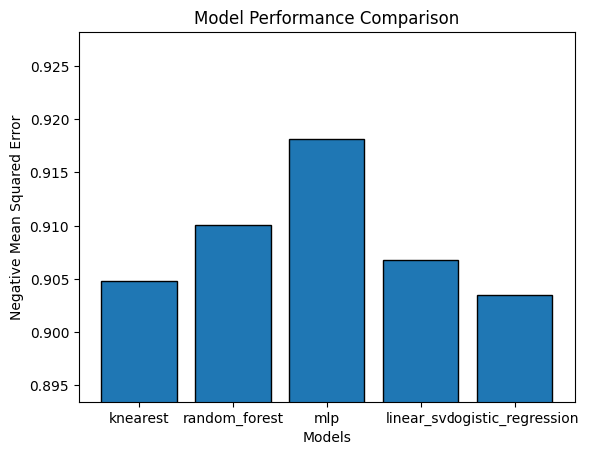

In [37]:
labels = list(results.keys())
values = [res.best_score_ for res in results.values()]
plt.bar(labels, values, edgecolor="black")
y_offset = 0.01
plt.ylim(min(values) - y_offset, max(values) + y_offset)
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Negative Mean Squared Error")
plt.show()

In [38]:
best_result = results["mlp"]

In [39]:
best_model = best_result.best_estimator_
print("Best Parameters")
for param, value in best_result.best_params_.items():
    print(f"{param}: {value}")

Best Parameters
classifier: MLPClassifier(hidden_layer_sizes=(50, 50), random_state=42)
classifier__activation: relu
classifier__alpha: 0.0001
classifier__hidden_layer_sizes: (50, 50)
classifier__solver: adam


## Performance on Test Set

### Classification Report

In [40]:
y_pred = best_model.predict(X_test)

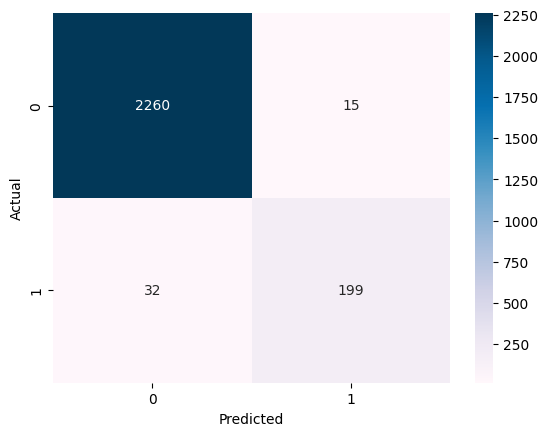

In [41]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuBu")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2275
           1       0.93      0.86      0.89       231

    accuracy                           0.98      2506
   macro avg       0.96      0.93      0.94      2506
weighted avg       0.98      0.98      0.98      2506



### Performance Curves

In [43]:
y_score = best_model.predict_proba(X_test)[:, 1]

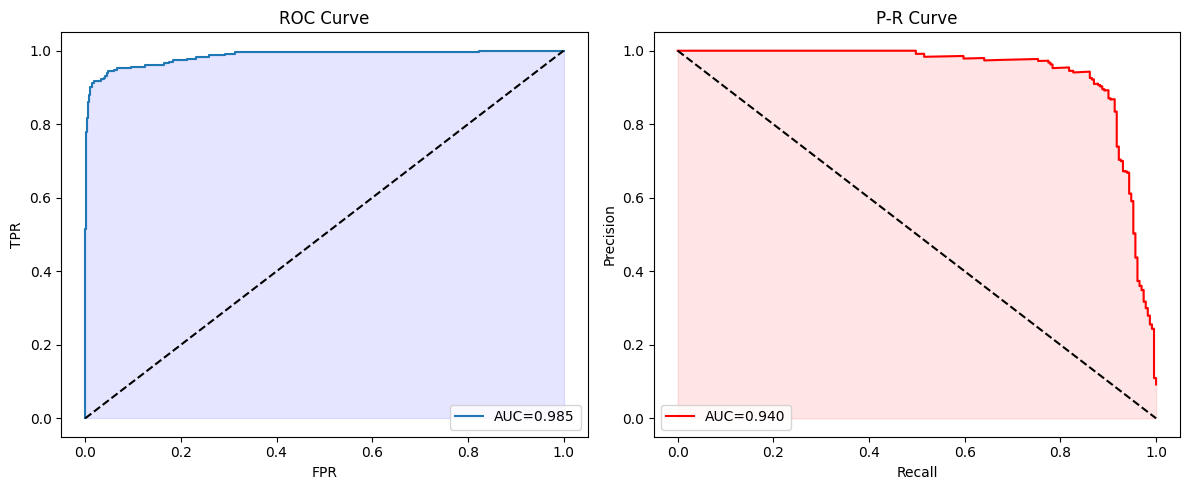

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.fill_between(fpr, tpr, alpha=0.1, color="b")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()

precision, recall, _ = precision_recall_curve(y_test, y_score)
pr_auc = average_precision_score(y_test, y_score)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"AUC={pr_auc:.3f}", color="r")
plt.fill_between(recall, precision, alpha=0.1, color="r")
plt.plot([0, 1], [1, 0], "k--")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("P-R Curve")
plt.legend()

plt.tight_layout()
plt.show()

# Applying Best Model to Completely Unseen Data

In [45]:
unseen_df = pd.read_csv("pulsar_data_test.csv")

In [46]:
unseen_df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [47]:
unseen_df = unseen_df.rename(columns=header_dict)

In [48]:
unseen_df.drop(Class, axis=1, inplace=True)

In [49]:
unseen_df = unseen_df.replace(" ", np.nan)

In [50]:
null_counts = unseen_df.isnull().sum()
total_rows = unseen_df.shape[0]
null_percentage = (null_counts / total_rows) * 100
print(null_percentage)

IntegratedProfileMean           0.000000
IntegratedProfileStdDev         0.000000
IntegratedProfileExKurtosis    14.283054
IntegratedProfileSkewness       0.000000
DMSNRMean                       0.000000
DMSNRStdDev                     9.757914
DMSNRExKurtosis                 0.000000
DMSNRSkewness                   4.543762
dtype: float64


In [51]:
unseen_scaled_continuous = scaler.transform(unseen_df[continuous_columns])

unseen_scaled_continuous_df = pd.DataFrame(unseen_scaled_continuous, columns=continuous_columns)

In [52]:
unseen_scaled_continuous_df.head()

,IntegratedProfileMean,IntegratedProfileStdDev,IntegratedProfileExKurtosis,IntegratedProfileSkewness,DMSNRMean,DMSNRStdDev,DMSNRExKurtosis,DMSNRSkewness
0,0.225887,0.349452,-0.273379,-0.307849,-0.325993,-0.439118,-0.046153,-0.248830
1,-1.388911,-1.795657,1.471244,1.133007,-0.301378,-0.227173,-0.283433,-0.464457
2,-0.306883,0.065494,0.028464,-0.151848,-0.352815,-0.546852,0.220598,-0.001359
3,-0.392676,0.300287,0.509451,-0.097582,2.342194,2.807710,-1.732843,-1.000330
4,0.082085,0.303434,-0.173325,-0.238629,-0.215876,0.011676,-0.837318,-0.785722


In [53]:
imputer.fit(unseen_scaled_continuous_df)

unseen_df_imputed = pd.DataFrame(imputer.transform(unseen_scaled_continuous_df), columns=unseen_scaled_continuous_df.columns)

C:\Users\Chaos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [54]:
unseen_df_imputed.head()

,IntegratedProfileMean,IntegratedProfileStdDev,IntegratedProfileExKurtosis,IntegratedProfileSkewness,DMSNRMean,DMSNRStdDev,DMSNRExKurtosis,DMSNRSkewness
0,0.225887,0.349452,-0.273379,-0.307849,-0.325993,-0.439118,-0.046153,-0.248830
1,-1.388911,-1.795657,1.471244,1.133007,-0.301378,-0.227173,-0.283433,-0.464457
2,-0.306883,0.065494,0.028464,-0.151848,-0.352815,-0.546852,0.220598,-0.001359
3,-0.392676,0.300287,0.509451,-0.097582,2.342194,2.807710,-1.732843,-1.000330
4,0.082085,0.303434,-0.173325,-0.238629,-0.215876,0.011676,-0.837318,-0.785722


## Final Guess

In [55]:
best_model.predict(unseen_df_imputed)

array([0, 1, 0, ..., 0, 0, 0])

---